In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA 
from scipy.stats.distributions import chi2
sns.set()

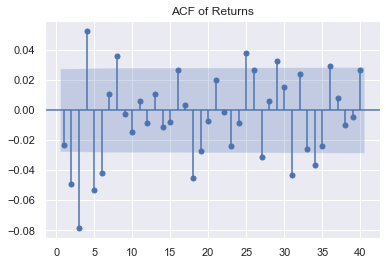

In [16]:
def LLR_Test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p
raw_csv_data = pd.read_csv("Index2018.csv")

df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True )
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'], df_comp['dax'], df_comp['nikkei'], df_comp['ftse']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df['returns'] = df.market_value.pct_change(1).mul(100)
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title("ACF of Returns")
plt.show()

## MA For Returns

In [17]:
model_ma1 = ARMA(df.returns[1:], order=(0,1)) # in order(0,1) first in AR component and second is MA Component
model_ma1 = model_ma1.fit()
model_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 21 Aug 2021   AIC                          15865.190
Time:                        12:33:42   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
model_ma2 = ARMA(df.returns[1:], order=(0,2)) 
model_ma2 = model_ma2.fit()
print(model_ma2.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma1, model_ma2)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 21 Aug 2021   AIC                          15853.728
Time:                        12:33:51   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [21]:
model_ma3 = ARMA(df.returns[1:], order=(0,3)) 
model_ma3 = model_ma3.fit()
print(model_ma3.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma2, model_ma3)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 21 Aug 2021   AIC                          15818.634
Time:                        12:35:27   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [22]:
model_ma4 = ARMA(df.returns[1:], order=(0,4)) 
model_ma4 = model_ma4.fit()
print(model_ma4.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma3, model_ma4)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 21 Aug 2021   AIC                          15809.547
Time:                        12:36:24   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [23]:
model_ma5 = ARMA(df.returns[1:], order=(0,5)) 
model_ma5 = model_ma5.fit()
print(model_ma5.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma4, model_ma5)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 21 Aug 2021   AIC                          15799.645
Time:                        12:37:07   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [24]:
model_ma6 = ARMA(df.returns[1:], order=(0,6)) 
model_ma6 = model_ma6.fit()
print(model_ma6.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma5, model_ma6)}")

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 21 Aug 2021   AIC                          15794.442
Time:                        12:38:04   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [26]:
model_ma7 = ARMA(df.returns[1:], order=(0,7)) 
model_ma7 = model_ma7.fit()
print(model_ma7.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma6, model_ma7)}") 
#Here we can stop and select the 6th lag but looking at the ACF in the beginning of the notebook
#It would be a good idea to test the 8th lag as well 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 21 Aug 2021   AIC                          15796.091
Time:                        12:41:52   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [27]:
model_ma8 = ARMA(df.returns[1:], order=(0,8)) 
model_ma8 = model_ma8.fit()
print(model_ma8.summary())
print(f"LLR Test p-value : {LLR_Test(model_ma7, model_ma8)}") 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 21 Aug 2021   AIC                          15791.205
Time:                        12:42:41   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [29]:
#As the result for 8th lag is significant now we have to make the decision on wether to select till 6th lag or 8th 
LLR_Test(model_ma6, model_ma8, DF=2)

0.027

This means that the complex model is going to perform well so we'll select till 8th lag

## Residual of Returns

In [47]:
model_ma8 = ARMA(df.returns[1:], order=(0,8)) 
df['res_ret_ma8'] = model_ma8.fit().resid[1:]
round(df.res_ret_ma8.mean(),3), round(df.res_ret_ma8.var(),3), round(df.res_ret_ma8.std(),3)
#Considering the Emperical rule for Gussian normal distribution we woould be able to find the value within the interval
# (3*1.164= 3.5) [-3.5 --- +3.5] for 99.7% of the time 

(-0.0, 1.356, 1.164)

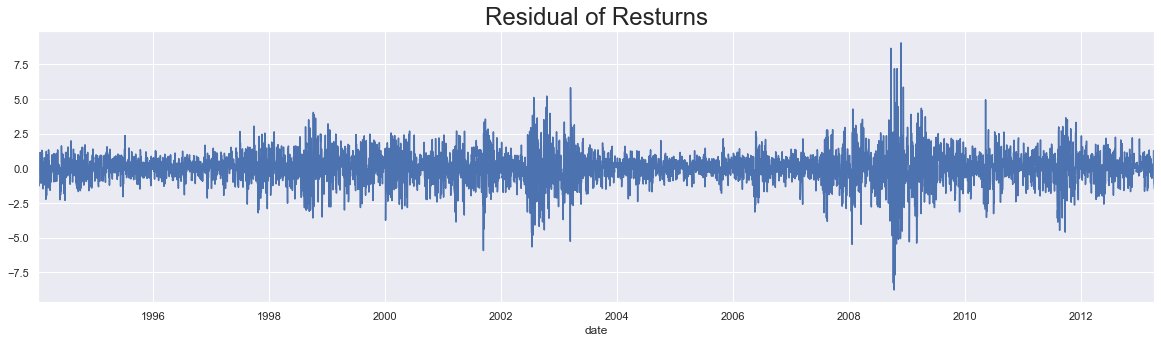

In [48]:
df.res_ret_ma8.plot(figsize=(20,5))
plt.title("Residual of Resturns", size= 24)
plt.show()

In [50]:
adfuller(df.res_ret_ma8[2:]) #data is indeed stationary

(-70.83581447507991,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185189197)

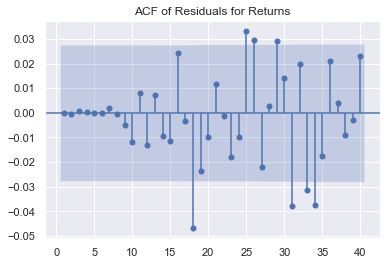

In [51]:
sgt.plot_acf(df.res_ret_ma8[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns")
plt.show() # residuals are not significant for first 24 intervals, next in the interval doesnt matter much

## Normalized Return

In [54]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

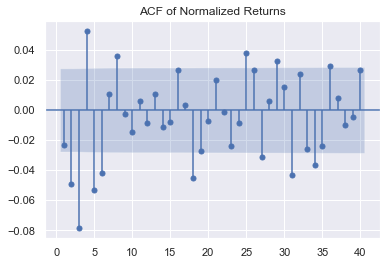

In [56]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title("ACF of Normalized Returns")
plt.show()

In [58]:
model_norm_ma1 = ARMA(df.norm_ret[1:], order= (0,8))
results_norm_ma1 = model_norm_ma1.fit()
results_norm_ma1.summary() #Same values!, normalizing the input data does not affect the model selecion

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sat, 21 Aug 2021   AIC                          80635.194
Time:                        14:36:41   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_ret    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_ret     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_ret    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_ret    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_ret     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_ret     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

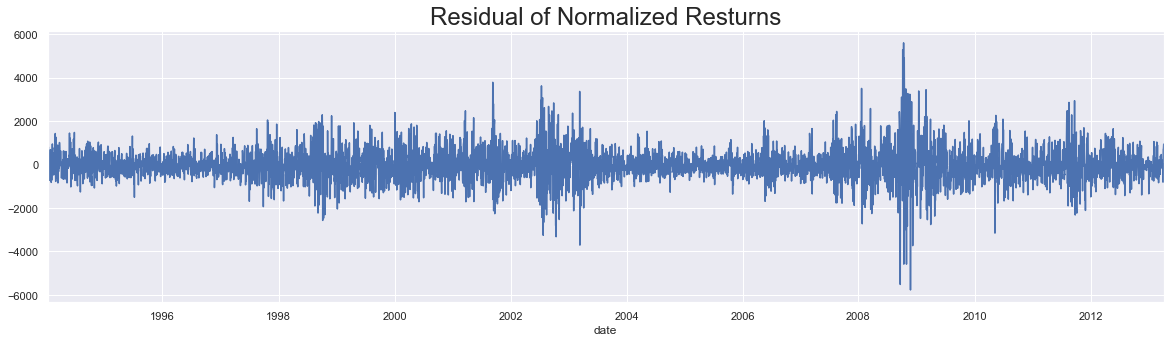

In [61]:
df['res_norm_ret_ma8'] = results_norm_ma1.resid[1:]
df.res_norm_ret_ma8.plot(figsize=(20,5))
plt.title("Residual of Normalized Resturns", size= 24)
plt.show()

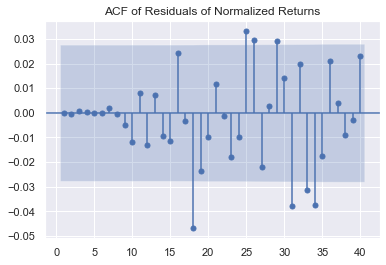

In [63]:
sgt.plot_acf(df.res_norm_ret_ma8[2:], zero=False, lags=40)
plt.title("ACF of Residuals of Normalized Returns")
plt.show()  #Perfect! ACF suggests that the data is white noise

## MA Model for Prices

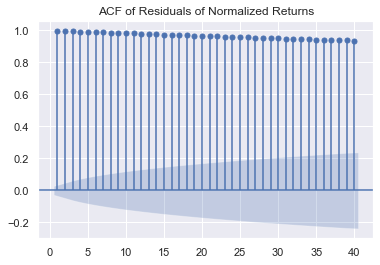

In [64]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title("ACF of Residuals of Normalized Returns")
plt.show()

In [65]:
model_ma1 = ARMA(df.market_value, order=(0,1))
results_ma1 = model_ma1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Sat, 21 Aug 2021   AIC                          77264.000
Time:                        14:53:10   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6136     14.660    347.188      0.000    5060.882    5118.346
ma.L1.market_value     0.9573      0.003    335.558      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

## ARMA

In [66]:
model_ret_ar1_ma1 = ARMA(df.returns[1:], order=(1,1))
resutls_ret_ar1_ma1 = model_ret_ar1_ma1.fit()
resutls_ret_ar1_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 21 Aug 2021   AIC                          15841.000
Time:                        15:01:50   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [70]:
model_ret_ar1 = ARMA(df.returns[1:], order = (1,0))
model_ret_ma1 = ARMA(df.returns[1:], order = (0,1))
print(LLR_Test(model_ret_ar1.fit(), model_ret_ar1_ma1.fit()))
print(LLR_Test(model_ret_ma1.fit(), model_ret_ar1_ma1.fit()))

0.0
0.0


## Higher-Lag ARMA Models

In [82]:
model_ret_ar3_ma3 = ARMA(df.returns[1:], order=(3,3))
resutls_ret_ar3_ma3 = model_ret_ar3_ma3.fit()
print(resutls_ret_ar3_ma3.summary())
print(f"LLR Test p-value : {LLR_Test(resutls_ret_ar1_ma1, resutls_ret_ar3_ma3, DF=4)}") 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 21 Aug 2021   AIC                          15803.030
Time:                        20:07:19   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     

In [84]:
model_ret_ar3_ma2 = ARMA(df.returns[1:], order=(3,2))
resutls_ret_ar3_ma2 = model_ret_ar3_ma2.fit()
resutls_ret_ar3_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 21 Aug 2021   AIC                          15805.495
Time:                        20:14:37   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.001       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

In [85]:
model_ret_ar2_ma3 = ARMA(df.returns[1:], order=(2,3))
resutls_ret_ar2_ma3 = model_ret_ar2_ma3.fit()
resutls_ret_ar2_ma3.summary() #One of the MA coefficient is not significantly different from zero, so we should avoid using this model

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 21 Aug 2021   AIC                          15805.174
Time:                        20:16:41   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.797      -0.041
ma.L1.returns     0.5378      0.090      6.000      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5096           -0.0000j            4.5096           -0.0000
-----------------------------------------------------------------------------
"""

In [88]:
LLR_Test(resutls_ret_ar2_ma3, resutls_ret_ar3_ma3) #at 5% significance level, the model is slightly better

0.042

In [89]:
model_ret_ar3_ma1 = ARMA(df.returns[1:], order=(3,1))
resutls_ret_ar3_ma1 = model_ret_ar3_ma1.fit()
print(resutls_ret_ar3_ma1.summary())
print(f"LLR Test p-value : {LLR_Test(resutls_ret_ar3_ma1, resutls_ret_ar3_ma2)}") 

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 21 Aug 2021   AIC                          15810.144
Time:                        21:01:47   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     

p-value = 0.01 thus the more complicated model is the better approximator

In [92]:
model_ret_ar2_ma2 = ARMA(df.returns[1:], order=(2,2))
resutls_ret_ar2_ma2 = model_ret_ar2_ma2.fit()
print(resutls_ret_ar2_ma2.summary()) #Second lag for both AR and MA seems to be insignificant so we would avoid this model

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Sat, 21 Aug 2021   AIC                          15838.446
Time:                        21:13:35   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     

In [96]:
model_ret_ar1_ma3 = ARMA(df.returns[1:], order=(1,3))
resutls_ret_ar1_ma3 = model_ret_ar1_ma3.fit()
print(resutls_ret_ar1_ma3.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 21 Aug 2021   AIC                          15805.676
Time:                        21:20:27   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095     

The models are not nested here. So, we would use the following approach to compara the log likelihood and information gain (AIC)

In [101]:
print("\n ARMA(3,2) : \tLL = ", resutls_ret_ar3_ma2.llf, "\tAIC =",resutls_ret_ar3_ma2.aic)
print("\n ARMA(1,3) : \tLL = ", resutls_ret_ar1_ma3.llf, "\tAIC =", resutls_ret_ar1_ma3.aic)


 ARMA(3,2) : 	LL =  -7895.747458514525 	AIC = 15805.49491702905

 ARMA(1,3) : 	LL =  -7896.837893752858 	AIC = 15805.675787505716


ARMA(3,2) performs better than it's simpler counter part

Let's now analyze the residuals of the selected model

## Residuals for Return

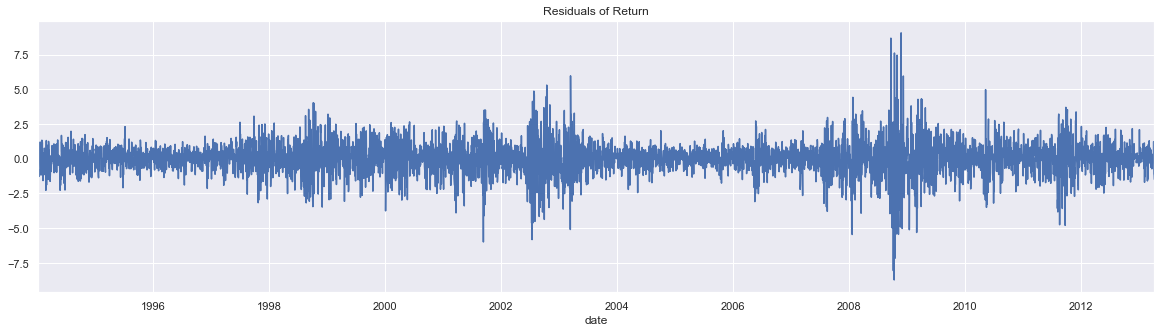

In [103]:
df['res_ret_ar2_ma3'] = resutls_ret_ar2_ma3.resid[1:]
df.res_ret_ar2_ma3.plot(figsize=(20,5))
plt.title("Residuals of Return")
plt.show();

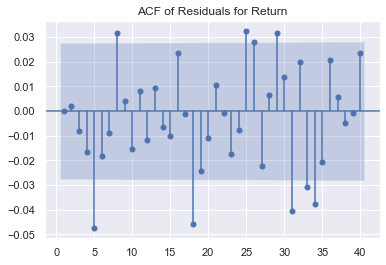

In [104]:
sgt.plot_acf(df.res_ret_ar2_ma3[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Return")
plt.show() #As 5th seems to be significant so we should try (5,5) with the possible permutations

In [106]:
model_ret_ar5_ma5 = ARMA(df.returns[1:], order=(5,5))
resutls_ret_ar5_ma5 = model_ret_ar5_ma5.fit()
print(resutls_ret_ar5_ma5.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Sat, 21 Aug 2021   AIC                          15788.321
Time:                        23:09:22   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     

In [107]:
model_ret_ar5_ma1 = ARMA(df.returns[1:], order=(5,1))
resutls_ret_ar5_ma1 = model_ret_ar5_ma1.fit()
print(resutls_ret_ar5_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 21 Aug 2021   AIC                          15794.623
Time:                        23:11:28   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     

In [108]:
model_ret_ar1_ma5 = ARMA(df.returns[1:], order=(1,5))
resutls_ret_ar1_ma5 = model_ret_ar1_ma5.fit()
print(resutls_ret_ar1_ma5.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 21 Aug 2021   AIC                          15797.947
Time:                        23:11:56   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     

In [110]:
print("\n ARMA(5,1) : \tLL = ", resutls_ret_ar5_ma1.llf, "\tAIC =",resutls_ret_ar5_ma1.aic)
print("\n ARMA(1,5) : \tLL = ", resutls_ret_ar1_ma5.llf, "\tAIC =", resutls_ret_ar1_ma5.aic) 
# (5,1) selected! lets comprae it with previously selected (3,2)


 ARMA(5,1) : 	LL =  -7889.311282945809 	AIC = 15794.622565891617

 ARMA(1,5) : 	LL =  -7890.973460209438 	AIC = 15797.946920418875


In [112]:
print("\n ARMA(3,2) : \tLL = ", resutls_ret_ar3_ma2.llf, "\tAIC =",resutls_ret_ar3_ma2.aic)
print("\n ARMA(5,1) : \tLL = ", resutls_ret_ar5_ma1.llf, "\tAIC =", resutls_ret_ar5_ma1.aic)
# (5,1) out performs (3,2)


 ARMA(3,2) : 	LL =  -7895.747458514525 	AIC = 15805.49491702905

 ARMA(5,1) : 	LL =  -7889.311282945809 	AIC = 15794.622565891617


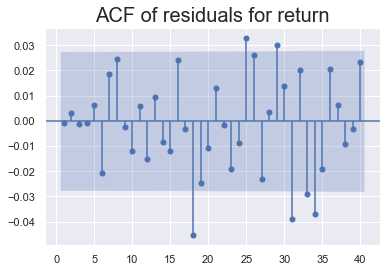

In [115]:
df['res_ret_ar5_ma1'] = resutls_ret_ar5_ma1.resid
sgt.plot_acf(df.res_ret_ar5_ma1[1:], zero=False, lags=40)
plt.title('ACF of residuals for return', size=20)
plt.show() #There are no significant values till 14th

## ARMA Model for prices 

Trying out on non-stationary data

In [116]:
model_ar1_ma1 = ARMA(df.market_value, order=(1,1))
resutls_ar1_ma1 = model_ar1_ma1.fit()
print(resutls_ar1_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.789
Method:                       css-mle   S.D. of innovations             59.248
Date:                Sat, 21 Aug 2021   AIC                          55251.579
Time:                        23:31:58   BIC                          55277.664
Sample:                    01-07-1994   HQIC                         55260.719
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6415    496.783     10.245      0.000    4115.965    6063.318
ar.L1.market_value     0.9985      0.001   1323.194      0.000       0.997       1.000
ma.L1.market_value  

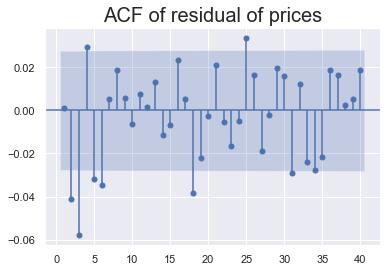

In [119]:
df['res_ar1_ma1'] = resutls_ar1_ma1.resid
sgt.plot_acf(df.res_ar1_ma1, zero=False, lags=40)
plt.title("ACF of residual of prices", size= 20)
plt.show() #points are significant till 6th lag

In [122]:
model_ar6_ma6 = ARMA(df.market_value, order=(6,6))
resutls_ar6_ma6 = model_ar6_ma6.fit(start_ar_lags=11)
print(resutls_ar6_ma6.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Sat, 21 Aug 2021   AIC                          55203.864
Time:                        23:39:35   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6479    568.287      8.956      0.000    3975.825    6203.471
ar.L1.market_value     1.9274      0.032     59.886      0.000       1.864       1.990
ar.L2.market_value  

In [123]:
model_ar5_ma6 = ARMA(df.market_value, order=(5,6))
resutls_ar5_ma6 = model_ar5_ma6.fit(start_ar_lags=7)
print(resutls_ar5_ma6.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Sat, 21 Aug 2021   AIC                          55201.726
Time:                        23:41:42   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6467    580.767      8.764      0.000    3951.365    6227.929
ar.L1.market_value     1.3585      0.178      7.649      0.000       1.010       1.707
ar.L2.market_value  

In [124]:
model_ar6_ma1 = ARMA(df.market_value, order=(6,1))
resutls_ar6_ma1 = model_ar6_ma1.fit(start_ar_lags=7)
print(resutls_ar6_ma1.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Sat, 21 Aug 2021   AIC                          55206.389
Time:                        23:42:27   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6412    586.510      8.678      0.000    3940.103    6239.180
ar.L1.market_value     1.3921      0.058     23.931      0.000       1.278       1.506
ar.L2.market_value  

In [126]:
print("\n ARMA(5,6) : \tLL = ", resutls_ar5_ma6.llf, "\tAIC =",resutls_ar5_ma6.aic)
print("\n ARMA(6,1) : \tLL = ", resutls_ar6_ma1.llf, "\tAIC =", resutls_ar6_ma1.aic)
#(5,6) Outperforms


 ARMA(5,6) : 	LL =  -27587.862948674825 	AIC = 55201.72589734965

 ARMA(6,1) : 	LL =  -27594.194570829408 	AIC = 55206.389141658816


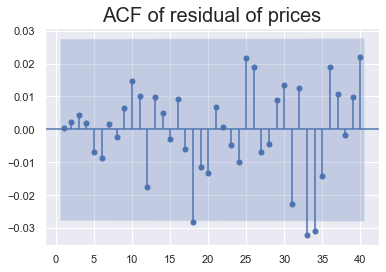

In [128]:
df['res_ar5_ma6'] = resutls_ar5_ma6.resid
sgt.plot_acf(df.res_ar5_ma6, zero=False, lags=40)
plt.title("ACF of residual of prices", size= 20);

only 3 lags are significant so it's random and perfectly depicts the white noise<BR>
But should'nt it be performing poor on non-stationary data, let's check out 

In [130]:
print("\n ARMA(5,6) : \tLL = ", resutls_ar5_ma6.llf, "\tAIC =",resutls_ar5_ma6.aic)
print("\n ARMA(5,1) : \tLL = ", resutls_ret_ar5_ma1.llf, "\tAIC =", resutls_ret_ar5_ma1.aic)


 ARMA(5,6) : 	LL =  -27587.862948674825 	AIC = 55201.72589734965

 ARMA(5,1) : 	LL =  -7889.311282945809 	AIC = 15794.622565891617


We have to go with the model based on stationary data(5,1). Eventhough the ARMA model was performing good enough on non-stationary data(prices) but it's real capability is with stationary data(returns)<br>

We can use ARIMA (Auto Regressive Integrated Moving Average) Model to handle non-stationary data as an input, which is available at: <br>
https://github.com/Hassi34/TimeSeriesAnalysis/blob/main/TimeSeriesAnalysis3_ARIMA_Model.ipynb